In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("breast_cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


##  Feature Extraction
-------------------------------

In [4]:
target = df["diagnosis"]
features_drop = ["id", "diagnosis", "Unnamed: 32"]
data = df.drop(features_drop, axis = 1)

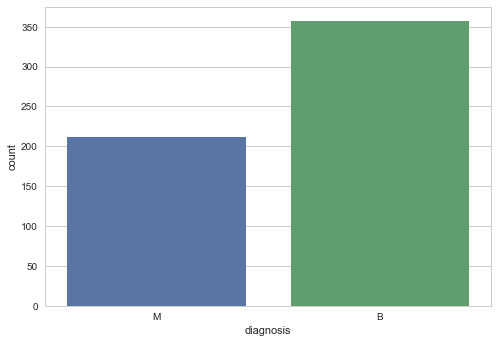

In [5]:
sns.countplot(df['diagnosis'],label="Count")
plt.show()

### Correlation 

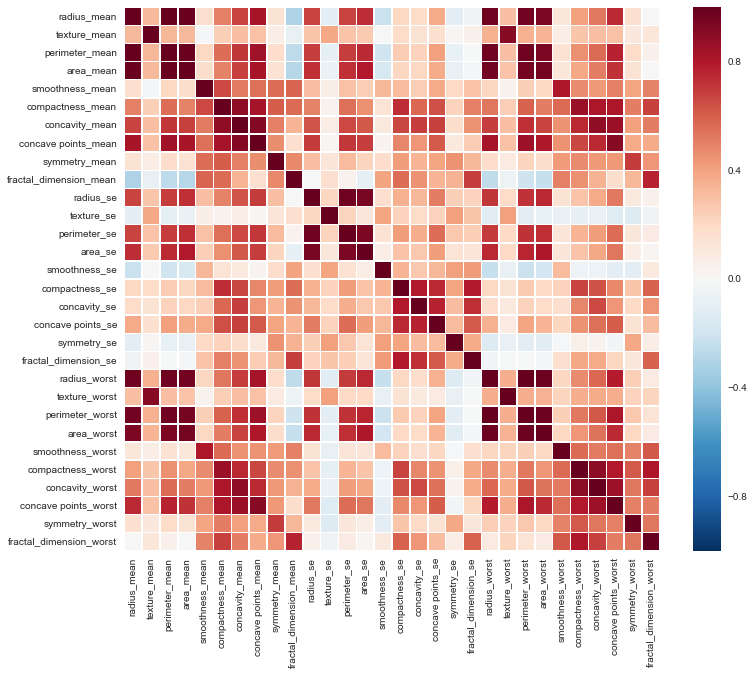

In [6]:
plt.figure(figsize = (12,10))

sns.heatmap(data.corr(), linewidths = 0.5)
plt.show()

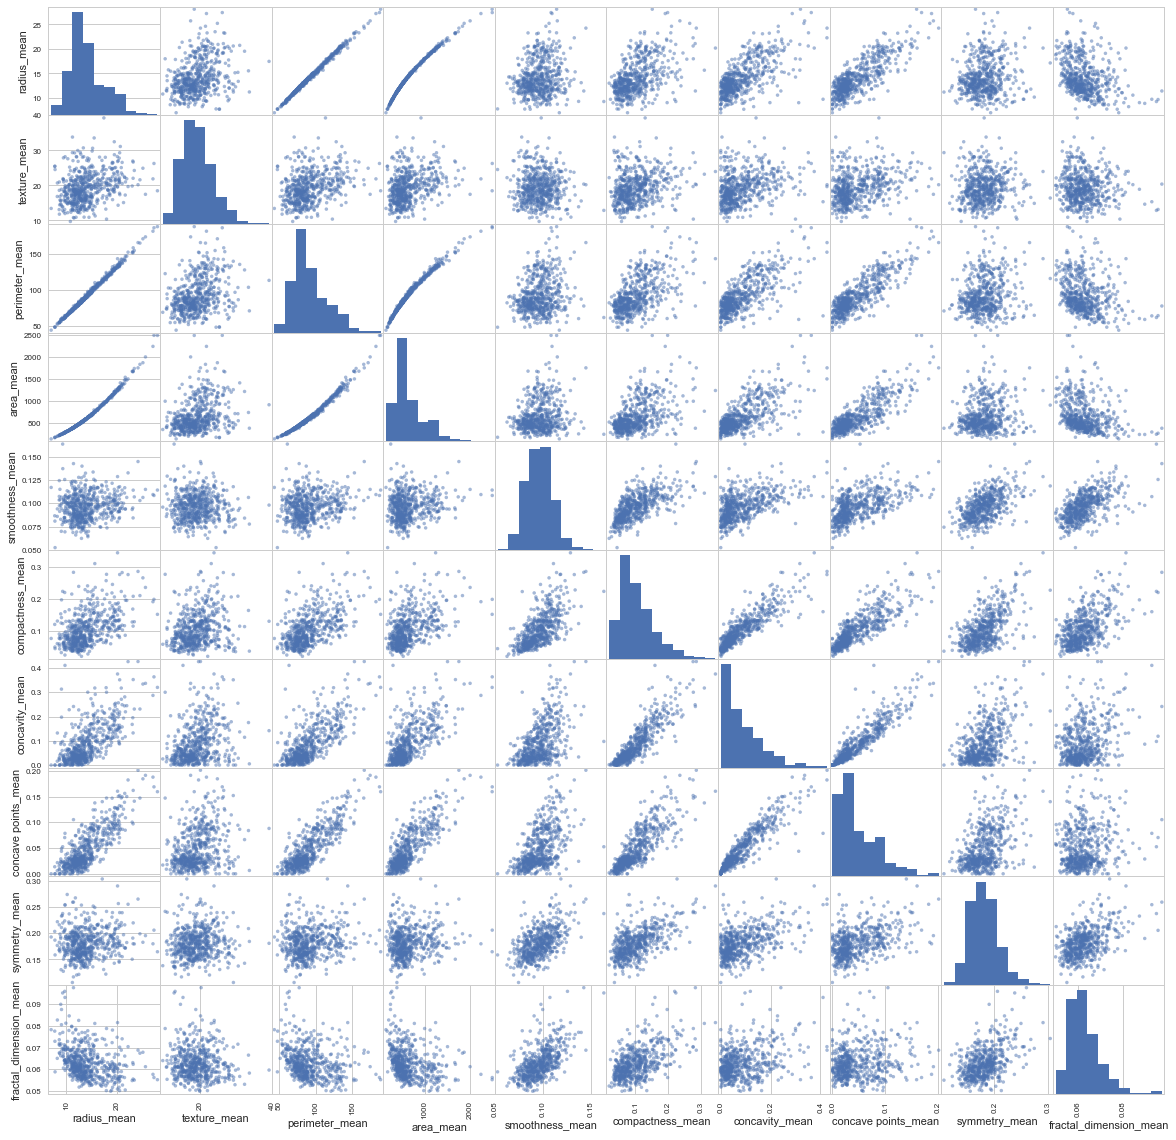

In [7]:
plt.figure()
pd.plotting.scatter_matrix(data.iloc[:,0:10], figsize = (20,20))
plt.show()

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data_std = (data - data.mean())/data.std()

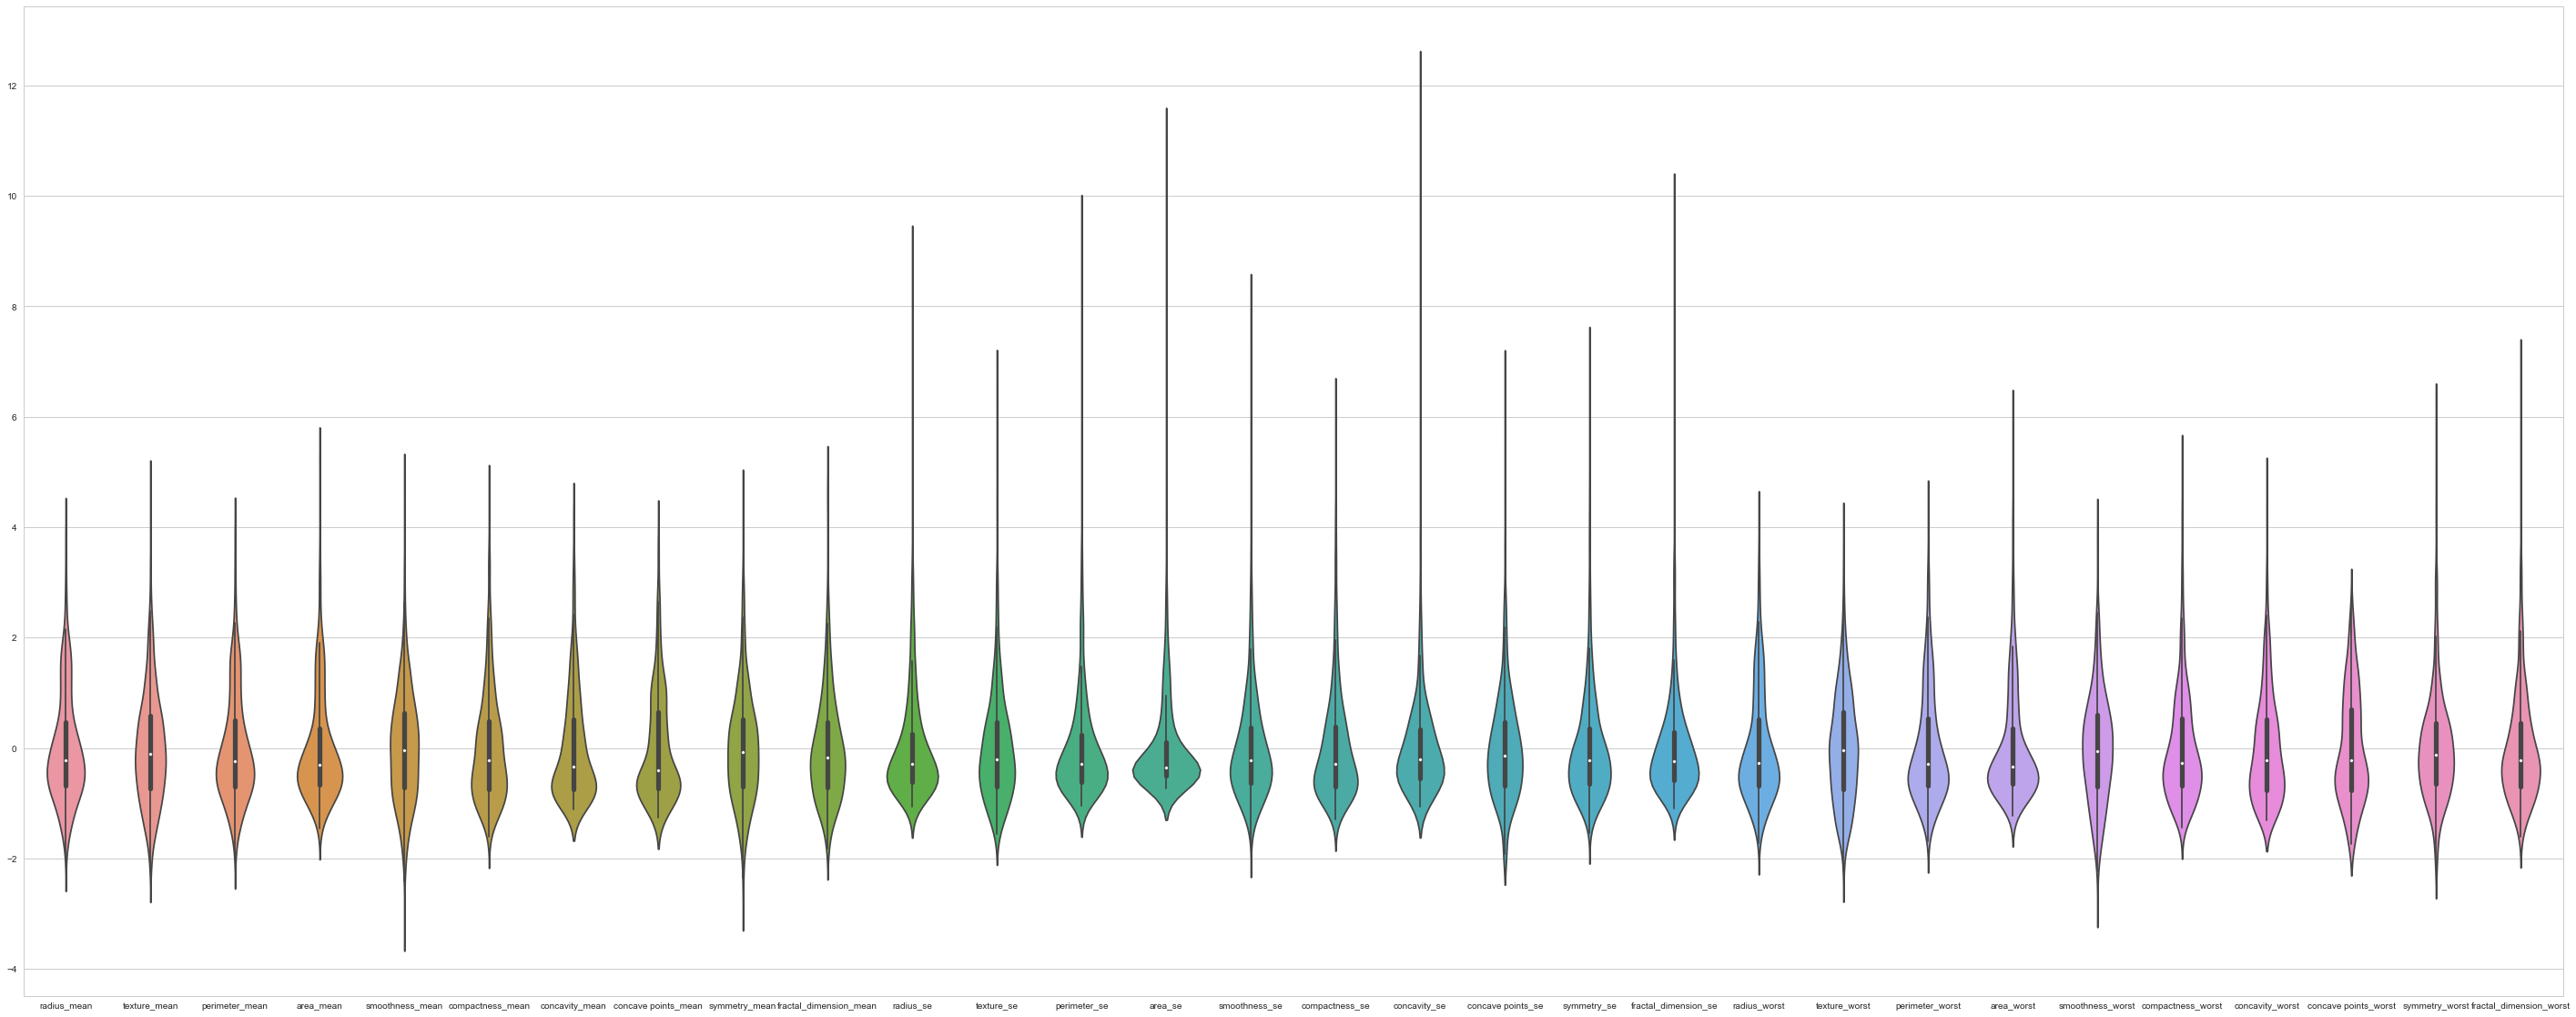

In [10]:
plt.figure(figsize = (50,20))
sns.violinplot(data=data_std)
plt.show()

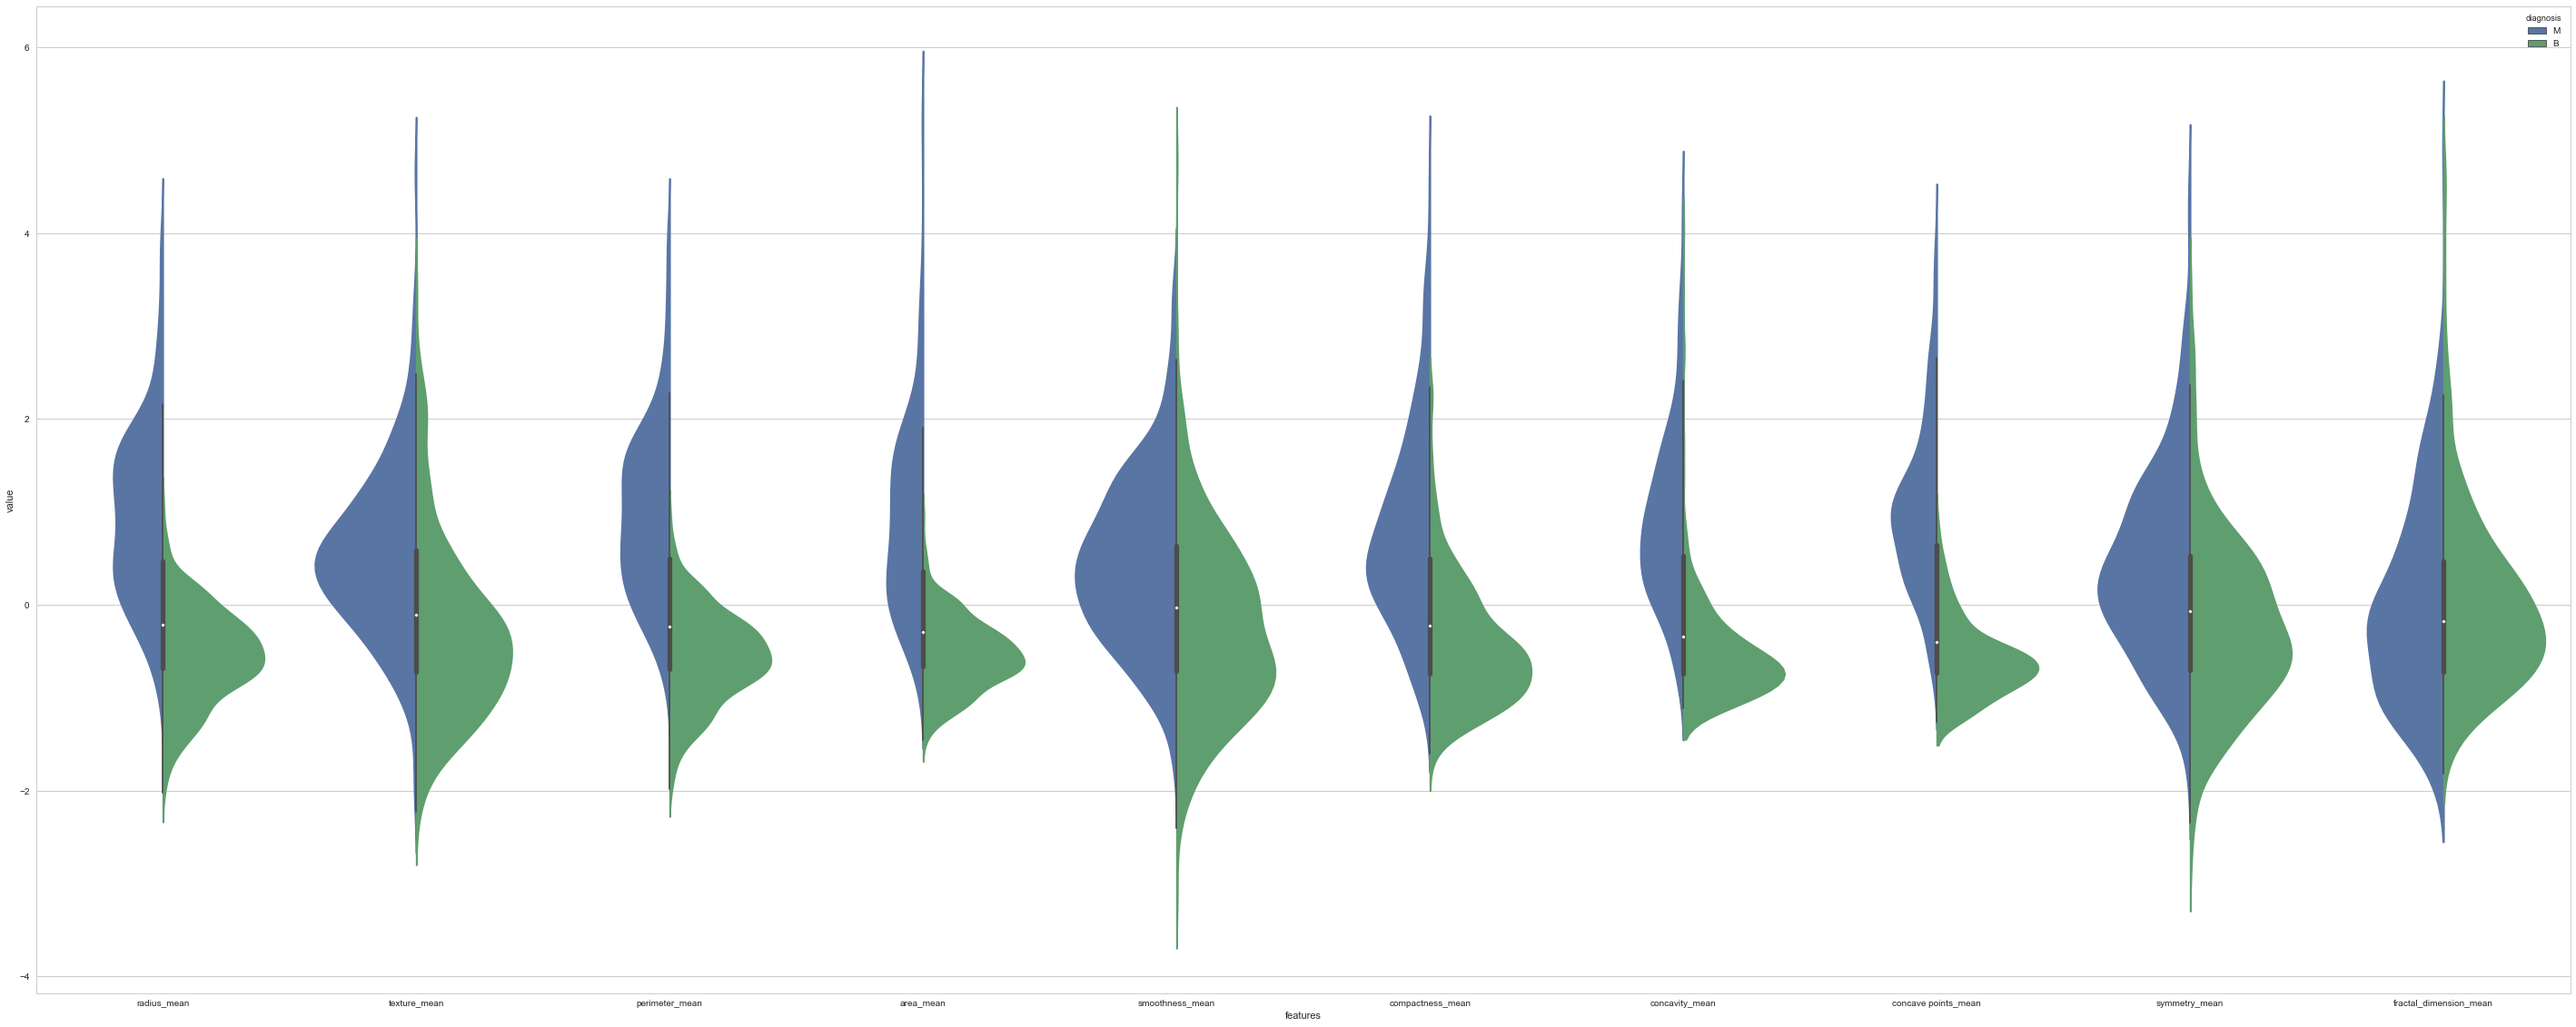

In [11]:
data_l = pd.concat([target, data_std.iloc[:,0:10]], axis=1)
data_r = pd.melt(data_l,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(50,20))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_r, split=True)
plt.show()

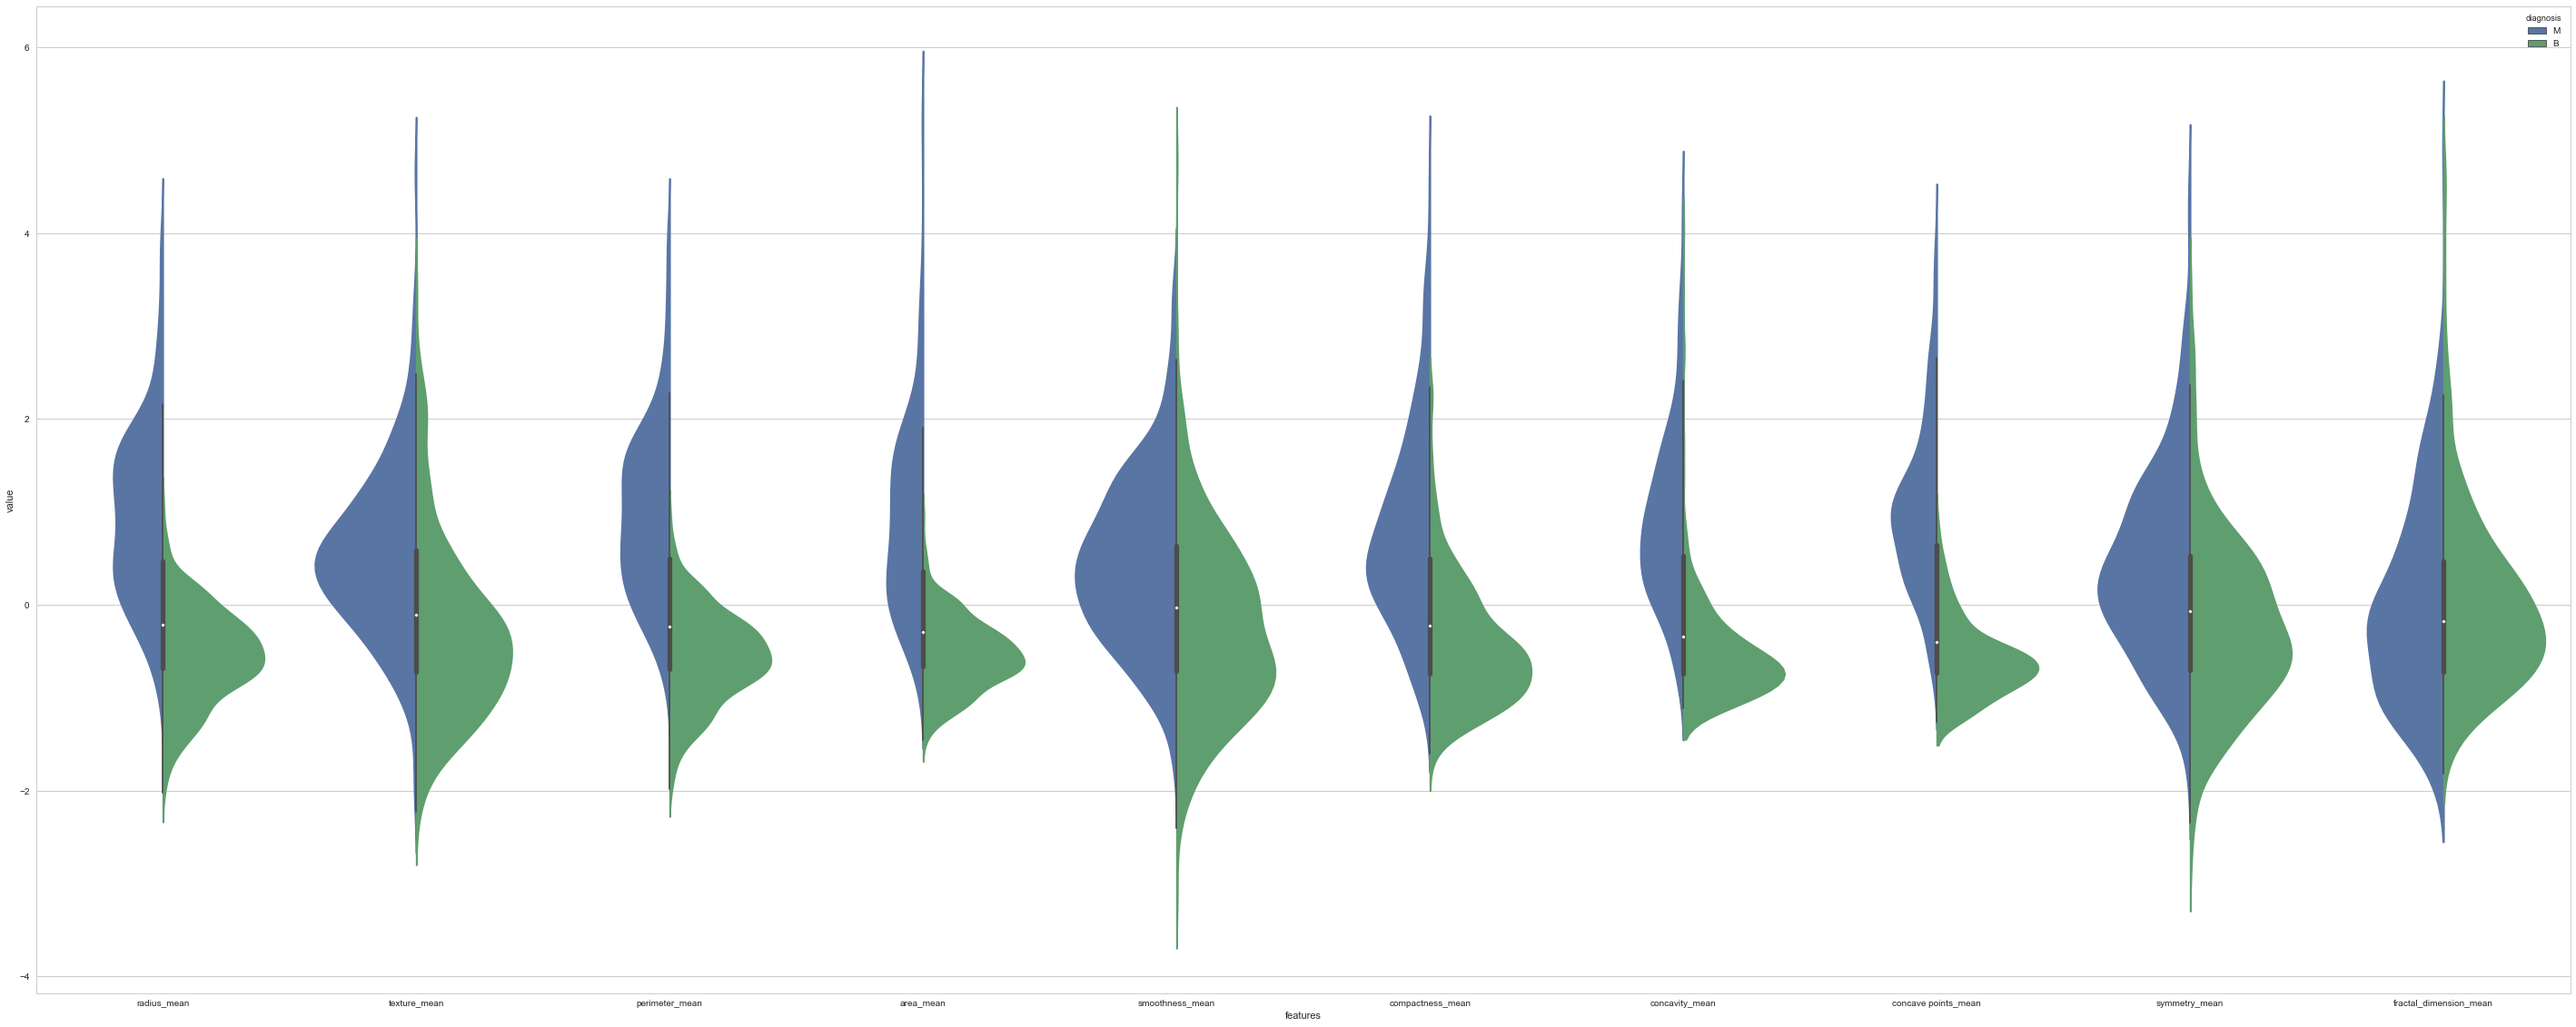

In [12]:

plt.figure(figsize=(50,20))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_r, split=True)
plt.show()

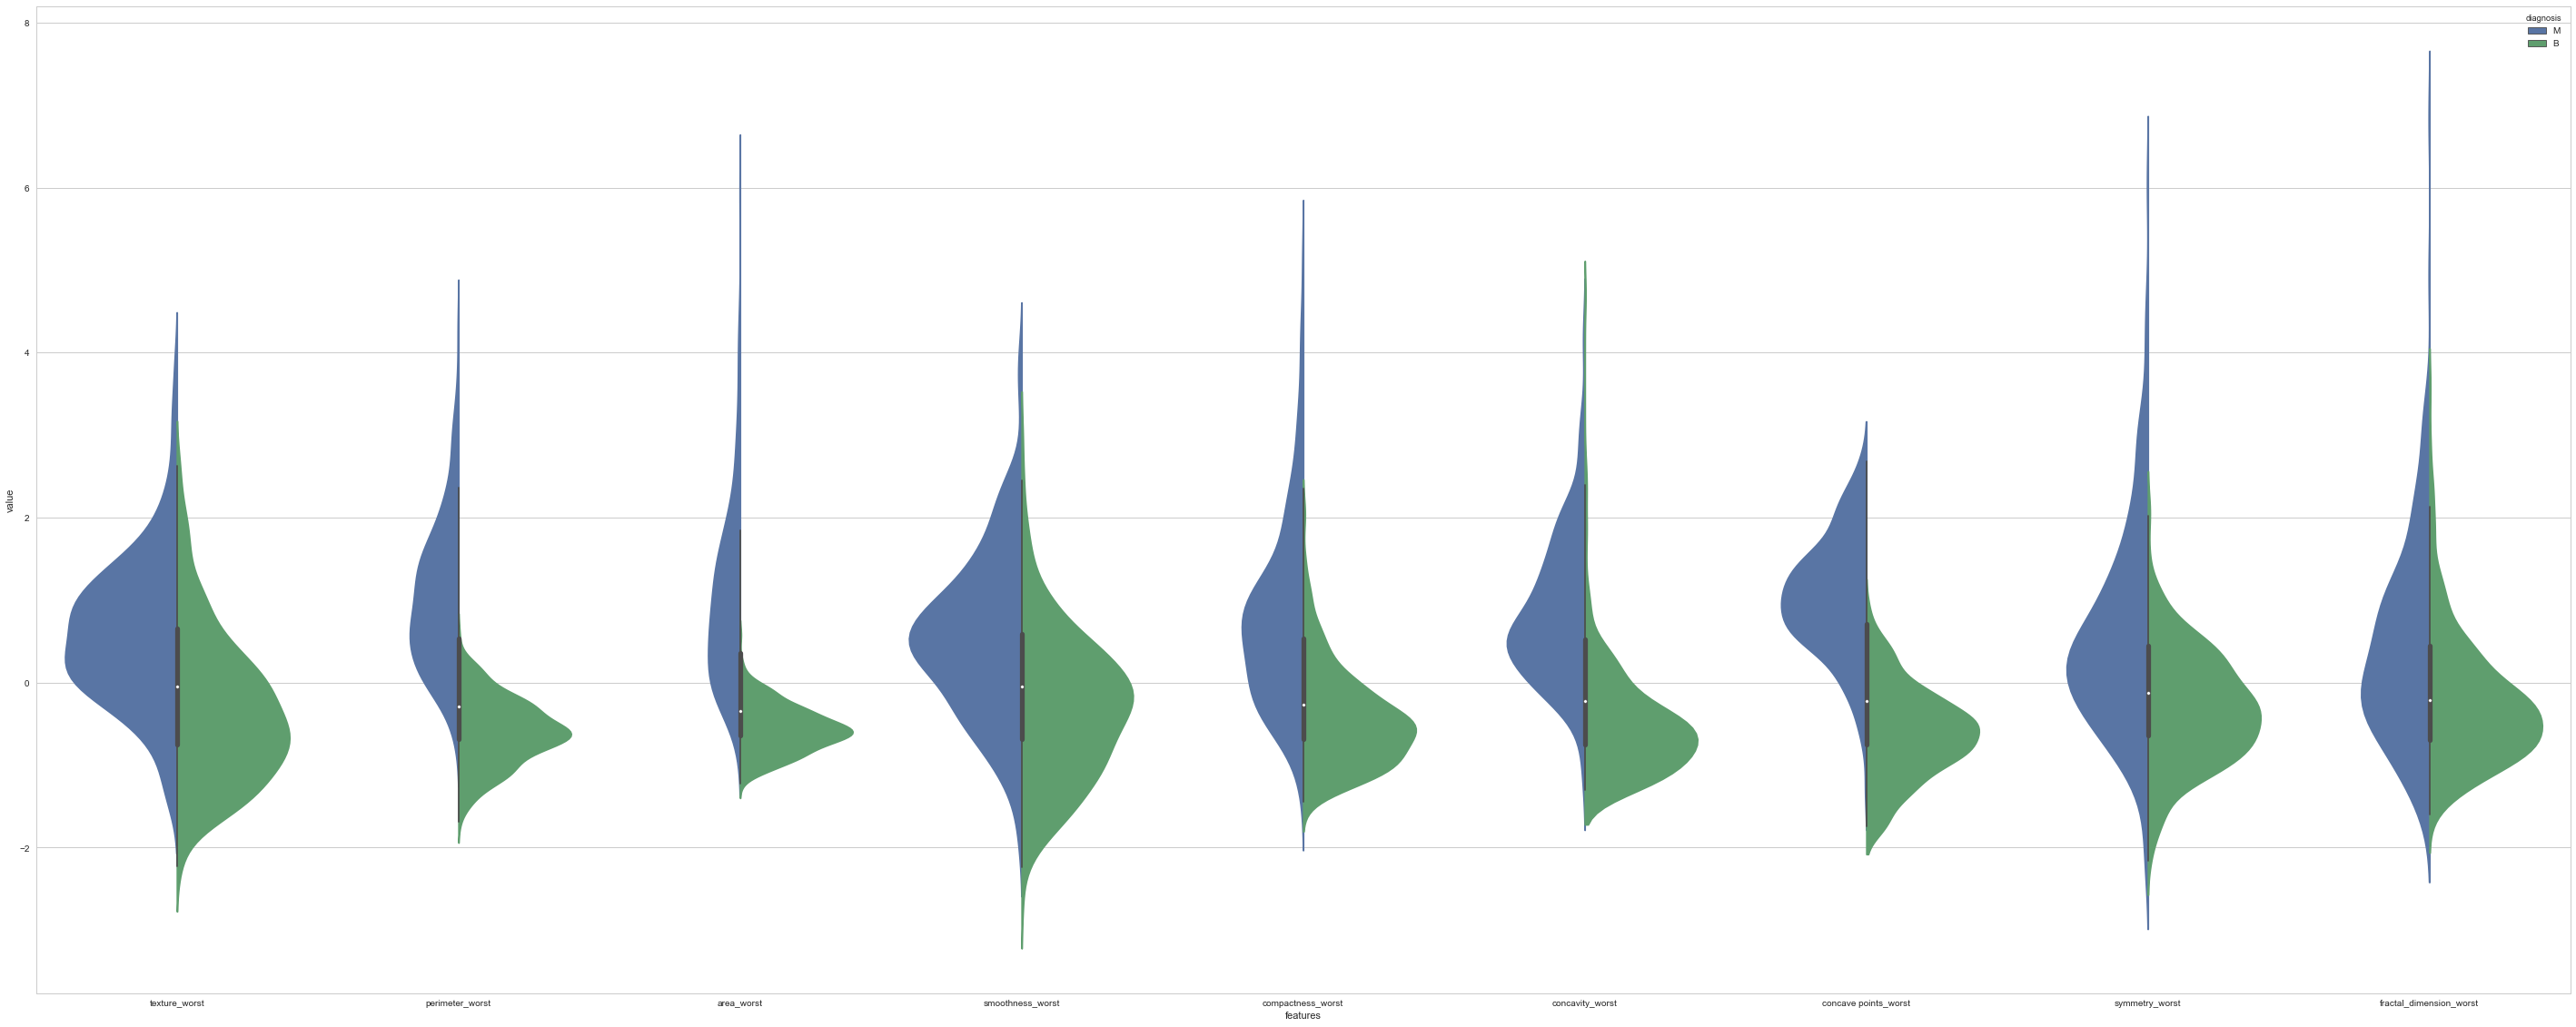

In [13]:
data_l = pd.concat([target, data_std.iloc[:,21:30]], axis=1)
data_r = pd.melt(data_l,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(50,20))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_r, split=True)
plt.show()


### PCA-1

In [14]:
from sklearn.decomposition import PCA

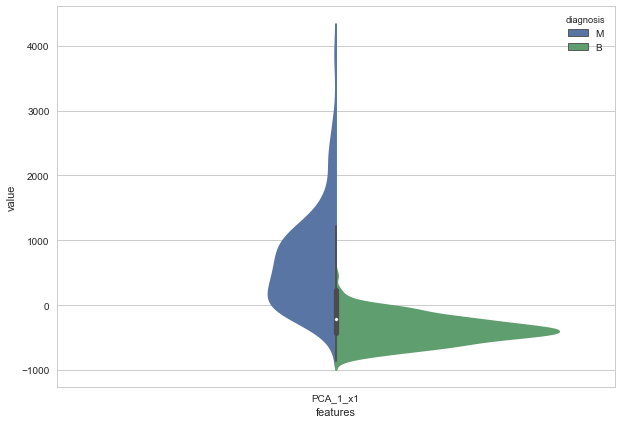

In [15]:
pca = PCA(n_components = 1)
proj_data = pca.fit_transform(data)
df_proj = pd.DataFrame({"PCA_1_x1": proj_data[:,0], "diagnosis": target.values.tolist()})

data_proj = pd.melt(df_proj,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(10,7))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_proj, split=True)
plt.show()

### PCA-2

In [16]:
pca = PCA(n_components = 2)
proj_data = pca.fit_transform(data)
df_proj = pd.DataFrame({"PCA_2_x1": proj_data[:,0], "PCA_2_x2":proj_data[:,1], "diagnosis": target.values.tolist()})

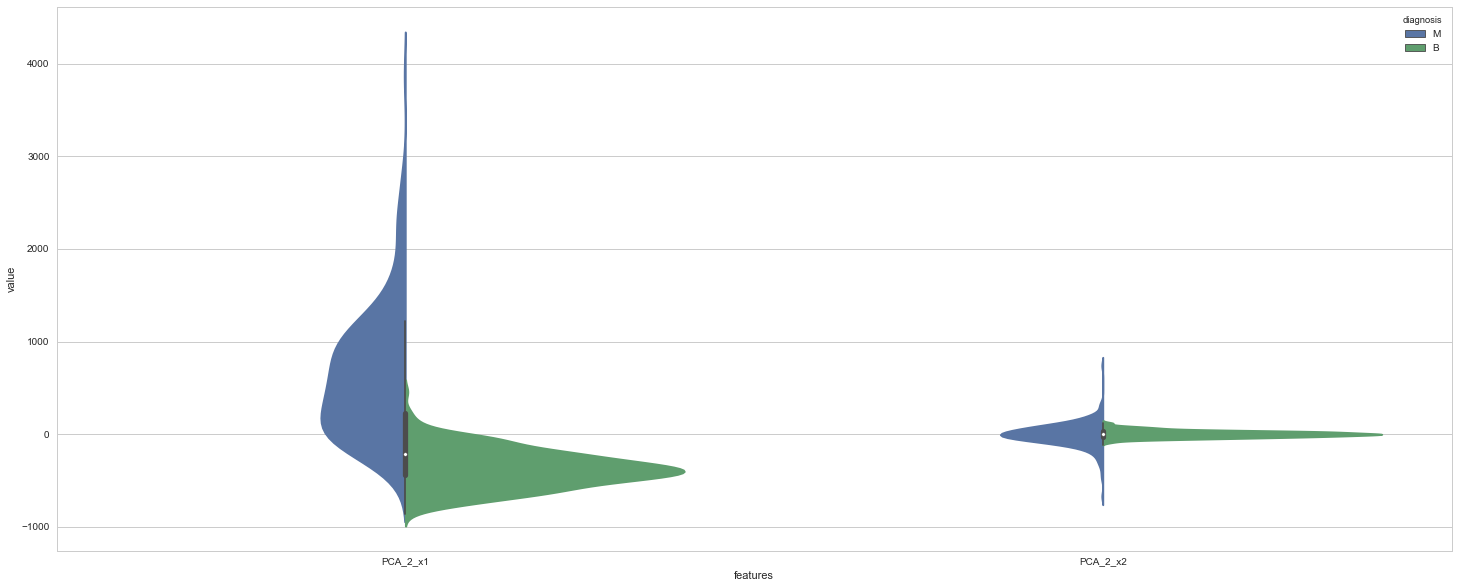

In [17]:
data_proj = pd.melt(df_proj,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

plt.figure(figsize=(25,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data_proj, split=True)
plt.show()

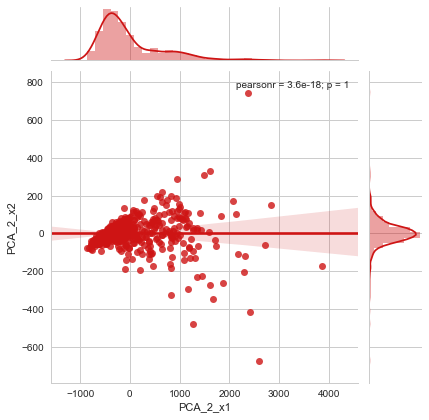

In [18]:
#plt.figure(figsize = (50,50))
sns.jointplot(df_proj.loc[:,"PCA_2_x1"], df_proj.loc[:,'PCA_2_x2'], kind = "reg", color="#ce1414")
plt.show()

## Topological Data Analysis

In [19]:
#prepare data for mapper
data_mapper = [data.iloc[i,:].tolist() for i in range(len(data))]

import mapper as mp
out = mp.Mapper(lens = "PCA", clusterer = "DBSCAN", n_rcover = [100, 2], clusterer_params  = (0.1,5))
out.write_to_json(data_mapper)

![alt text](Breast_Cancer_TDA/breast_cancer_kaggle_mapper_PCA_100_2.png "mapper_PCA_100_2")


In [20]:
out = mp.Mapper(lens = "eccentricity", clusterer = "DBSCAN", n_rcover = [100, 2], clusterer_params  = (0.1,5))
out.write_to_json(data_mapper)

![alt text](Breast_Cancer_TDA/breast_cancer_kaggle_eccentricity_100_2.png "mapper_eccentricity")


In [21]:
# prepare data for k-nerve

data_kn = [data.iloc[i,:].tolist() for i in range(len(data))]
labels = target.values.tolist()
labels_kn = list(map(lambda x: 1 if x=="M" else 0, labels))

In [22]:
import k_nerve as kn
KN = kn.k_Nerve(n_components = 2, covering_size = 225, overlap = 0.65)
KN.draw(data_kn, labels_kn)

building cover ....
clustering covers by connected components ......
building nerve .......
 making vertices ....
 making edges .....
 making faces ......
building json data..........
DONE!!


![alt text](Breast_Cancer_TDA/breast_cancer_kaggle_225_065.png "k-nerve_2_225_065")


In [23]:
import k_nerve as kn
KN = kn.k_Nerve(n_components = 3, covering_size = 100, overlap = 0.25)
KN.draw(data_kn, labels_kn)

building cover ....
clustering covers by connected components ......
building nerve .......
 making vertices ....
 making edges .....
 making faces ......
building json data..........
DONE!!


![alt text](Breast_Cancer_TDA/breast_cancer_kaggle_3_100_025.png "k-nerve_3_100_025")